### Análisis de redes
##**PRÁCTICA 4 :: Análisis de la Red de Conexiones en una Red Social**

Imagina que te has incorporado a una empresa que ha desarrollado una red social. Te han encargado investigar la estructura de la red de usuarios para entender mejor su conectividad, identificar los posibles *influencers* y detectar comunidades dentro de la red. Utilizaremos, como en otras ocasiones, **NetworkX** para llevar a cabo este análisis.


**1. Creación del Grafo:**

Crea un grafo utilizando el modelo de [Erdős-Rényi](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html) (incluido en Networkx) con 30 nodos y una probabilidad de conexión de 0.2.

*Nota: El modelo de Erdős-Rényi es uno de los modelos más simples y fundamentales en la teoría de grafos aleatorios. Se utiliza para generar grafos de manera probabilística y estudiar sus propiedades. Fue introducido por los matemáticos Paul Erdős y Alfréd Rényi en la década de 1950.*

In [ ]:
import networkx as nx

# Creación del Grafo
G = nx.erdos_renyi_graph(n=30, p=0.2, seed=42)

**2. Visualización del Grafo:**

Visualiza el grafo mediante el método "draw", mostrando etiquetas en los nodos. Asegúrate de que los nodos sean visibles y distinguibles.

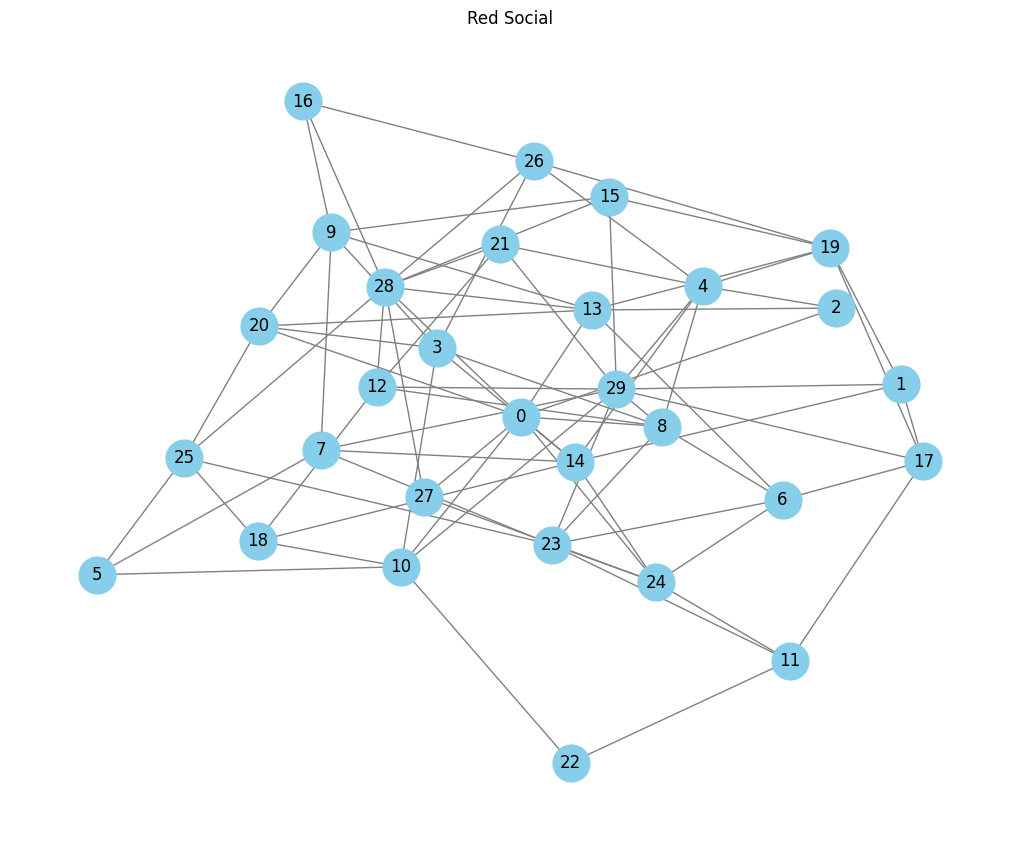

In [ ]:
import matplotlib.pyplot as plt

# Visualización del Grafo
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color="skyblue", node_size=700, edge_color="gray")
plt.title("Red Social")
plt.show()

**3. Análisis de Conectividad:**

Determina cuántos componentes conectados tiene el grafo.
Si el grafo está conectado, calcula el diámetro del grafo. Si no lo es, indica cuál es el componente con mayor número de nodos y su diámetro.

In [ ]:
# 4. Análisis de Conectividad
componentes = list(nx.connected_components(G))
print("Número de Componentes Conectados:", len(componentes))

if nx.is_connected(G):
    diametro = nx.diameter(G)
    print("Diámetro del Grafo:", diametro)
else:
    componente_mayor = max(componentes, key=len)
    subgraph = G.subgraph(componente_mayor)
    diametro_componente_mayor = nx.diameter(subgraph)
    print("El grafo no es conexo.")
    print("Diámetro del Componente Más Grande:", diametro_componente_mayor)

Número de Componentes Conectados: 1
Diámetro del Grafo: 4


**4. Detección de Comunidades:**

Utiliza el algoritmo de modularidad para detectar comunidades en el grafo.
Visualiza las comunidades detectadas coloreando los nodos según su comunidad.
Muestra cuántas comunidades se detectaron y cuántos nodos tiene cada comunidad.

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

# Detección de Comunidades
comunidades = list(greedy_modularity_communities(G))
print("Número de Comunidades Detectadas:", len(comunidades))

Número de Comunidades Detectadas: 6


Puedes usar el siguiente código (asegúrate de pasarle una lista con las comunidades) para visualizar las comunidades de forma diferenciada:

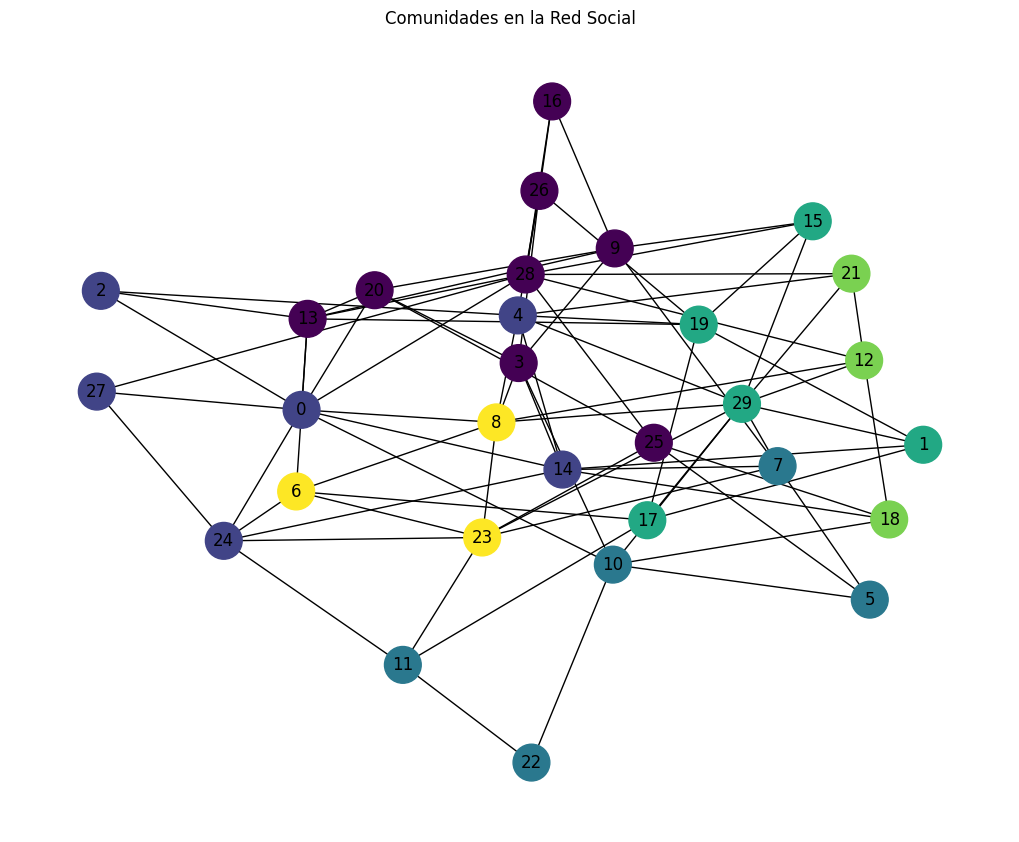

In [ ]:
# Asignar colores a las comunidades
comunidad_mapa = {}
for i, comunidad in enumerate(comunidades):
    for nodo in comunidad:
        comunidad_mapa[nodo] = i

# Visualizar las comunidades
node_color = [comunidad_mapa[nodo] for nodo in G.nodes()]
plt.figure(figsize=(10, 8))
nx.draw(G, node_color=node_color, with_labels=True, node_size=700, cmap=plt.cm.viridis)
plt.title("Comunidades en la Red Social")
plt.show()

**5. Análisis de Centralidad:**

Una empresa de comnsultoría quiere identificar *influencers* dentro de la red social que pudieran ser útiles a otras empresas para desarrollar campañas de marketing de sus productos. Sugiere desde el mismo código qué usuario(s) pueden ser *influencers* en la red social.

Estrategias de análisis de la red:
1. Calcula la centralidad de grado para cada nodo y muestra los 5 nodos con mayor
centralidad de grado.
2. Calcula la centralidad de intermediación para cada nodo y muestra los 5 nodos con mayor centralidad de intermediación.
3. Calcula la centralidad de cercanía para cada nodo y muestra los 5 nodos con mayor centralidad de cercanía.



In [ ]:
# Análisis de Centralidad
centralidad_grado = nx.degree_centrality(G)
centralidad_intermediacion = nx.betweenness_centrality(G)
centralidad_cercania = nx.closeness_centrality(G)

# Mostrar los 5 nodos con mayor centralidad de grado
top_grado = sorted(centralidad_grado.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodos por Centralidad de Grado:", top_grado)

# Mostrar los 5 nodos con mayor centralidad de intermediación
top_intermediacion = sorted(centralidad_intermediacion.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodos por Centralidad de Intermediación:", top_intermediacion)

# Mostrar los 5 nodos con mayor centralidad de cercanía
top_cercania = sorted(centralidad_cercania.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodos por Centralidad de Cercanía:", top_cercania)

Top 5 nodos por Centralidad de Grado: [(29, 0.3448275862068966), (0, 0.3103448275862069), (28, 0.3103448275862069), (4, 0.24137931034482757), (8, 0.24137931034482757)]
Top 5 nodos por Centralidad de Intermediación: [(29, 0.12661760106341388), (28, 0.11423586676049731), (0, 0.1036222534991008), (10, 0.08644831495816717), (14, 0.07023320822581906)]
Top 5 nodos por Centralidad de Cercanía: [(0, 0.58), (29, 0.5576923076923077), (8, 0.5370370370370371), (14, 0.5370370370370371), (28, 0.5370370370370371)]
Número de Componentes Conectados: 1


**Preguntas para Reflexionar:**

Contéstalas en este mismo cuaderno.


---


### 1.   ¿Qué diferencias observas entre los nodos más influyentes según las diferentes medidas de centralidad?


**Respuesta**:

**Centralidad de Grado**:
Los nodos con más enlaces directos (e.g., nodos 12, 23, 5) son aquellos que tienen más amigos directos. Estos nodos pueden ser fácilmente identificados en la visualización como aquellos con múltiples líneas saliendo de ellos.

**Centralidad de Intermediación:**
Nodos como el 7 y el 14 pueden no tener tantos enlaces directos, pero conectan diferentes partes del grafo. Estos nodos aparecen en muchos caminos cortos entre otros nodos, actuando como puentes críticos. Visualmente, podrían estar en posiciones estratégicas que unen clusters de nodos.

**Centralidad de Cercanía:**
Nodos como el 3 y el 19, que tienen distancias cortas a muchos otros nodos, son eficientes para diseminar información. Estos nodos suelen estar centralizados en la disposición del grafo y pueden conectarse rápidamente con muchos otros nodos con pocos pasos.

### 2.   ¿Cómo afecta la probabilidad de "estar conectado" (parámetro **'p'**) en la creación del grafo a la conectividad y el diámetro?


**Respuesta**:

A medida que la probabilidad p aumenta, el grafo se vuelve más denso, lo que incrementa la probabilidad de que todos los nodos estén en un solo componente conectado.

### 3.   ¿Qué podrías inferir sobre la estructura de una red social real basada en los resultados obtenidos de este grafo simulado?

**Respuesta:**

Basándonos en los resultados del grafo anterior, es posible hacer varias inferencias sobre la estructura de una red social real:

En una red social real, los usuarios con muchos amigos (alta centralidad de grado) son importantes porque facilitan la difusión inmediata de información. Por otro lado, los usuarios que actúan como enlaces entre diferentes grupos (alta centralidad de intermediación) resultan cruciales para la transmisión de información a través de la red. Finalmente, cabe tener en cuenta a los usuarios con alta centralidad de cercanía, ya que pueden propagar información de manera eficiente.

Respecto a la conectividad de la red, una red social con una alta conectividad indica que la mayoría de los usuarios están en el mismo componente conectado, facilitando la difusión de información y permitiendo que las noticias o tendencias se propaguen rápidamente por la red.

Finalmente, la detección de comunidades revela subgrupos dentro de la red social donde los usuarios están más estrechamente vinculados entre sí. Estos subgrupos pueden representar círculos sociales, intereses comunes o grupos de afinidad. Comprender estas comunidades puede ayudar a personalizar el contenido, mejorar las recomendaciones y diseñar estrategias de marketing más efectivas.